# GRB Redshift Prediction Using Machine Learning

| Section | Content |
|---------|---------|
| **Title** | **GRB Redshift Prediction Using Machine Learning** |
| **Goal** | Predict the redshift (cosmological distance) of Gamma-Ray Bursts (GRBs) using observable properties through a machine learning approach. |

## 1. Primary Objective: Redshift Prediction

| Component | Description |
|-----------|-------------|
| **Objective** | Build a stacked ensemble machine learning model to estimate redshift based on GRB observational parameters. |

### Input Features and Target

| Feature | Description |
|---------|-------------|
| T90 | Burst duration (in seconds) |
| Alpha | Low-energy spectral index |
| Beta | High-energy spectral index |
| Ep | Peak energy of the spectrum (keV) |
| Sbolo | Bolometric fluence (erg/cm²) |
| **Target** | Redshift (z) |

### Modeling Approach

| Component | Description |
|-----------|-------------|
| Base Learners | Multiple Deep Neural Networks (DNNs) with different architectures |
| Meta Learner | Random Forest Regressor |
| Ensemble Method | Stacked generalization (stacking) |

## 2. Scientific Context

| Problem | Significance |
|---------|-------------|
| Redshift measurement is challenging | Requires spectroscopy, which is expensive and often unavailable |
| Many GRBs lack redshift | Limits scientific exploration of GRB properties and cosmic distribution |
| ML-based "pseudo-redshifts" offer a solution | Enables large-scale statistical studies of GRBs without direct measurements |

## 3. Technical Approach

### Data Processing

| Step | Description |
|------|-------------|
| Log-transformation | Applied to skewed parameters |
| Standardization | Mean-zero, unit-variance scaling for all inputs |

### Model Architecture

| Model Name | Description |
|-----------|-------------|
| DNN1 | Shallow neural net with dropout |
| DNN2 | Deeper architecture with batch normalization |
| DNN3 | Lightweight net with L2 regularization |
| DNN4 | Wider net with ReLU activation layers |

### Evaluation Metrics

| Metric | Purpose |
|--------|---------|
| R² Score | Measures goodness of fit |
| RMSE | Root Mean Square Error |
| MAE | Mean Absolute Error |

### Validation Method

| Method | Description |
|--------|-------------|
| Kolmogorov-Smirnov (K-S) test | Compare distributions of true and predicted redshifts |
| Train/Test split validation | Standard validation approach |

## 4. Practical Applications

| Application Area | Use Case |
|------------------|----------|
| Population Studies | Explore GRB distribution over cosmic time |
| Cosmological Analyses | Constrain dark energy and star formation models |
| Luminosity Function Estimation | Derive GRB energy and brightness distributions |
| High-z Candidate Selection | Identify potential high-redshift GRBs for follow-up |

## 5. Output Analysis

| Analysis Component | Description |
|--------------------|-------------|
| Visual comparisons | True vs. predicted redshift distributions |
| K-S test | Confirms statistical similarity |
| Diagnostic plots | Scatter plots, histograms, and residual plots illustrate model performance |

### **Statistical Concepts & Intuitions with Typical Ranges**

| Concept / Method                            | Description                                                | Intuition                                                                              | Typical Range / Values                                                                                                  |
| ------------------------------------------- | ---------------------------------------------------------- | -------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------- |
| **Log Transformation**                      | Applied using `np.log10` on skewed features.               | Compresses scale; transforms multiplicative relationships to additive.                 | Output range depends on input; for positive values, typically `(-∞, +∞)`, but real inputs >0 lead to finite log values. |
| **Train-Test Split**                        | Splitting data (e.g., 70% train, 30% test).                | Balances training data size and unbiased evaluation.                                   | Test size between 0.1 and 0.4 common; here fixed at 0.3 (30%).                                                          |
| **StandardScaler (Z-score normalization)**  | Scales features to zero mean, unit variance.               | Centers and scales data for model convergence.                                         | Mean ≈ 0, Std ≈ 1 for each feature after scaling.                                                                       |
| **Feature Columns (TensorFlow)**            | Represents input features for model.                       | No numerical range; structure for TensorFlow API.                                      | N/A                                                                                                                     |
| **DNNRegressor**                            | Neural network regressor model.                            | Outputs continuous predictions.                                                        | Prediction values depend on target; here Redshift, typically ≥0, often in \[0, \~10].                                   |
| **Stacking Ensemble**                       | Combines predictions of multiple base models.              | Meta-model input shape: (#samples, #models).                                           | Meta-features normalized by input models’ outputs.                                                                      |
| **RandomForestRegressor (Meta-model)**      | Aggregates many decision trees' predictions.               | Output range same as target variable (Redshift).                                       | Redshift predicted range roughly \[0, 10] or data-specific.                                                             |
| **Mean Squared Error (MSE)**                | Avg squared error between predicted and true values.       | Sensitive to large errors.                                                             | MSE ≥ 0; lower is better; values depend on target scale.                                                                |
| **Root Mean Squared Error (RMSE)**          | Square root of MSE; in same units as target.               | Easier to interpret error magnitude.                                                   | RMSE ≥ 0; close to 0 is ideal; for redshift, typical RMSE \~0.1–1 depending on model.                                   |
| **Mean Absolute Error (MAE)**               | Avg absolute difference between prediction and true value. | Less sensitive to outliers than MSE.                                                   | MAE ≥ 0; typically slightly less than or near RMSE.                                                                     |
| **R² Score (Coefficient of Determination)** | Fraction of variance explained by model.                   | 1 means perfect prediction; 0 means predicts mean; <0 means worse than mean predictor. | Range: (-∞, 1]; good models usually >0.5, excellent >0.8.                                                               |
| **Kolmogorov–Smirnov (KS) Test**            | Tests if two samples come from same distribution.          | Higher p-value means distributions are similar.                                        | p-value range: \[0,1]; p > 0.05 typically means no significant difference.                                              |
| **Histogram Normalization**                 | Frequencies scaled to sum to 1.                            | Allows shape comparison of distributions.                                              | Values ∈ \[0,1], sum of bins = 1.                                                                                       |
| **Drop Missing Values (`dropna`)**          | Removes NaN rows.                                          | Ensures clean dataset for modeling.                                                    | N/A                                                                                                                     |
| **Batching in TensorFlow Dataset**          | Groups data in batches for training.                       | Batch size affects convergence speed and noise.                                        | Batch size typically from 16 to 512; here batch sizes like 100, 120, 160 used.                                          |
| **ReLU Activation Function**                | Applies max(0, x) per neuron.                              | Enables non-linear learning.                                                           | Output range: \[0, +∞).                                                                                                 |
| **Stochastic Gradient Descent (SGD)**       | Optimizes model weights.                                   | Step size controlled by learning rate.                                                 | Learning rate typically ∈ \[0.001, 0.1]; here 0.1 used (high but possibly okay with decay).                             |


- # Install the required Python packages:

In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -q seaborn scikit-learn xgboost statsmodels scipy openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -q vecstack

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install -q tensorflow

Note: you may need to restart the kernel to use updated packages.


In [42]:
# Suppress TensorFlow INFO and WARNING messages; show only errors
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 0 = all logs, 1 = filter INFO, 2 = filter WARNING, 3 = filter ERROR

- # Library versions printed:


In [13]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import sklearn
import xgboost
import statsmodels
import tensorflow as tf
import vecstack
import scipy

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("seaborn:", sns.__version__)
print("scikit-learn:", sklearn.__version__)
print("xgboost:", xgboost.__version__)
print("statsmodels:", statsmodels.__version__)
print("tensorflow:", tf.__version__)
print("vecstack:", vecstack.__version__)
print("scipy:", scipy.__version__)

pandas: 2.1.4
numpy: 1.26.4
matplotlib: 3.8.2
seaborn: 0.13.2
scikit-learn: 1.3.2
xgboost: 3.0.3
statsmodels: 0.14.5
tensorflow: 2.19.0
vecstack: 0.4.0
scipy: 1.11.4


- # Preparing libraries environment:


In [14]:
# === Data Manipulation ===
import pandas as pd
import numpy as np
import csv
import random
import math

# === Data Visualization ===
import matplotlib as mpl
import matplotlib.image as mpimg
import matplotlib.pylab as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import AutoMinorLocator
import seaborn as sns
from pylab import *  # Includes plotting and numerical functions
from matplotlib import rc  # For font/grid customization

# === Matplotlib Customization ===
font = {'family': 'serif', 'weight': 'bold', 'size': 15}
rc('font', **font)
rc('grid', linewidth=4)
rc('xtick.major', width=4, size=10)
rc('xtick.minor', width=3, size=4)
rc('ytick.major', width=3, size=8)
rc('ytick.minor', width=3, size=5)
mpl.rcParams['axes.linewidth'] = 3.5
fig = plt.figure(1, figsize=(15.5, 12))
subplots_adjust(hspace=0.5)

# === Model Evaluation & Preprocessing ===
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    mean_absolute_error
)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# === Model Selection & Cross Validation ===
from sklearn.model_selection import train_test_split, KFold

# === Traditional ML Models ===
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression,
    Ridge,
    Lasso
)
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    BaggingRegressor,
    ExtraTreesRegressor,
    StackingRegressor
)
from sklearn.neural_network import MLPRegressor

# === Advanced/Stacked Models ===
from vecstack import stacking

# === XGBoost ===
import xgboost as xgb

# === (Optional) CatBoost ===
# from catboost import CatBoostRegressor  # Optional: Uncomment if CatBoost is installed

# === TensorFlow / Keras (Recommended Approach) ===
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

# === TensorFlow (Deprecated Approach) ===
# Old import (deprecated in TensorFlow 2.x)
# from tensorflow.estimator import DNNRegressor  # Replaced by Keras-based models

# === Statistical Analysis ===
import statsmodels.api as sm

# === Scientific Computing ===
import scipy
from scipy import optimize
from scipy import *
from scipy.stats import multivariate_normal, kstest
import scipy.integrate as si
import scipy.constants as const

# === SciPy Precision Configuration ===
si.dps = 50  # Set decimal precision for integration

<Figure size 1550x1200 with 0 Axes>

## Imports and Plot Configuration for ML Workflow

| Category | Components | Details |
|----------|-----------|---------|
| **Data Handling** | `pandas`, `numpy`, `csv` | Data manipulation and I/O operations |
| **Visualization** | `matplotlib`, `seaborn` | Plotting libraries with custom styling via `matplotlib.rc` |
| **Statistical Analysis** | `scipy`, `statsmodels`, `kstest`, `multivariate_normal`, `integrate` | Statistical tests and distributions |

### Machine Learning Models

| Model Type | Libraries/Classes |
|------------|-------------------|
| Linear Models | `LinearRegression`, `Ridge`, `Lasso` |
| Tree-based | `RandomForestRegressor`, `ExtraTreesRegressor`, `GradientBoostingRegressor` |
| Boosting | `xgboost`, (optionally `catboost`), `GradientBoostingRegressor` |
| Neural Networks | `MLPRegressor`, `tensorflow.keras`, `DNNRegressor` |
| Ensemble Methods | `BaggingRegressor`, `StackingRegressor`, `vecstack` |

### Preprocessing & Evaluation

| Functionality | Tools |
|--------------|-------|
| Feature Scaling | `StandardScaler`, `MinMaxScaler` |
| Data Splitting | `train_test_split`, `KFold` |
| Metrics | `accuracy_score`, `mean_squared_error`, etc. |

### Plot Customization

| Aspect | Configuration Method |
|--------|----------------------|
| Professional Figures | Advanced `matplotlib.rcParams` settings |
| Layout Control | `gridspec` for complex figure arrangements |

- # Loading and processing dataset:


In [15]:
#dataset

# Load the Band Fluence dataset from the raw GitHub URL
url = 'https://raw.githubusercontent.com/Adrita-Khan/GRB-ML/main/Data/kw_band_flc.xlsx'
GBM_df = pd.read_excel(url)

# Specify the columns to extract
Columns = ['Redshift', 'T90', 'Alpha', 'Beta', 'Ep', 'Sbolo']
GBM_df = GBM_df[Columns]

# Apply a base-10 log transformation on selected columns
log = np.log10(GBM_df[['T90', 'Ep', 'Sbolo']])

# Extract Alpha and Beta spectral indices (not log-transformed)
Alpha_flc = GBM_df['Alpha']
Beta_flc = GBM_df['Beta']

# Add Alpha and Beta to the log dataframe
log['Alpha_flc'] = Alpha_flc
log['Beta_flc'] = Beta_flc

# Define predictors
predictors = log

# Define the target (output) column
target = 'Redshift'

# Prepare the final input (X) and output (y) datasets for modeling
Data_X = log
Data_y = GBM_df['Redshift']

# Check the length of the dataset
print(len(Data_y))

56


- # Splitting and scaling data:


In [16]:
# ------------------------------------------------------
# Step 1: Split data into training and testing sets
# ------------------------------------------------------

# X = input features, y = target/output
# test_size=0.3 means 30% of the data will be used for testing, 70% for training
# random_state of the split
X_train, X_test, y_train, y_test = train_test_split(Data_X, Data_y, test_size=0.3, random_state=42)

# ------------------------------------------------------
# Step 2: Feature scaling using StandardScaler
# ------------------------------------------------------

# Initialize a StandardScaler (z-score normalization: (x - mean) / std)
scaler = StandardScaler()

# Fit the scaler to the training data and apply the transformation
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data (using the parameters from training data)
X_test_scaled = scaler.transform(X_test)

# ------------------------------------------------------
# Step 3: Convert scaled arrays back to DataFrames with named columns
# ------------------------------------------------------

# columns names will be as 'feature_0', 'feature_1', ...
X_train_scaled = pd.DataFrame(X_train_scaled, columns=['feature_{}'.format(i) for i in range(X_train.shape[1])])

# Same for test set
X_test_scaled = pd.DataFrame(X_test_scaled, columns=['feature_{}'.format(i) for i in range(X_test.shape[1])])


- # Defining TensorFlow feature columns:

In [17]:
# Create TensorFlow feature columns for each input column in the training set
# These are used to define how input features are represented in a model
feature_columns = [tf.feature_column.numeric_column(column) for column in X_train_scaled.columns]

- # Defining and compiling neural networks: 

## Stacked Deep Neural Networks Using Keras Sequential API

In this implementation, I define and compile multiple deep neural network (DNN) models using TensorFlow's Keras `Sequential` API. These models are intended for use in a **stacking ensemble** to predict continuous values (i.e., for regression tasks).

### Key Components

- **Input Features**: The models use numerical features from `X_train`. These are declared using `feature_columns`, though the Keras models use `input_dim` directly.

- **Model List (`models`)**: A list of 4 neural network architectures is defined, each with increasing depth and varying number of neurons per layer:
  - **Model 1**: 2 hidden layers – `[64, 50]`
  - **Model 2**: 3 hidden layers – `[128, 64, 32]`
  - **Model 3**: 4 hidden layers – `[141, 77, 83, 66]`
  - **Model 4**: 5 hidden layers – `[156, 85, 42, 30, 22]`

- **Activation Function**: All hidden layers use the ReLU (`'relu'`) activation function, and the output layer uses `'linear'` for regression.

- **Compilation**:
  - **Loss**: `mean_squared_error`, suitable for regression.
  - **Optimizer**: Stochastic Gradient Descent (SGD) with a learning rate of `0.01`.

This setup allows for flexible model design and straightforward training using the Keras API, ideal for integration with tools like `scikit-learn` for stacking or ensembling.

# Explanation of TensorFlow Code for Multiple Sequential Models

| **Section** | **Code Snippet** | **Explanation** |
|-------------|------------------|------------------|
| **Imports** | `import tensorflow as tf`<br>`from tensorflow.keras.models import Sequential`<br>`from tensorflow.keras.layers import Dense`<br>`from tensorflow.keras.optimizers import SGD`<br>`from sklearn.model_selection import train_test_split`<br>`import numpy as np` | Imports necessary libraries for deep learning (TensorFlow), model building (Keras), optimizer (SGD), dataset splitting (scikit-learn), and array handling (NumPy). |
| **Feature Columns** | `feature_columns = [tf.feature_column.numeric_column(key=str(i)) for i in range(X_train.shape[1])]` | Creates a list of numeric feature columns using TensorFlow's `feature_column` API. Each column corresponds to one feature in the dataset. This is optional unless using the Estimator API. |
| **Model List** | `models = [...]` | A list of 4 different Keras `Sequential` models is defined. Each model increases in depth and width. All models are designed for **regression tasks** (last layer uses `linear` activation). |
| **Model 1** | `Dense(64, input_dim=..., activation='relu')` → `Dense(50, activation='relu')` → `Dense(1, activation='linear')` | A shallow network with 2 hidden layers. Used as a basic benchmark. |
| **Model 2** | `Dense(128)` → `Dense(64)` → `Dense(32)` → `Dense(1)` | A deeper network with 3 hidden layers. Allows for more complex pattern recognition. |
| **Model 3** | `Dense(141)` → `Dense(77)` → `Dense(83)` → `Dense(66)` → `Dense(1)` | An even deeper and wider model, increasing capacity to capture complex relationships in the data. |
| **Model 4** | `Dense(156)` → `Dense(85)` → `Dense(42)` → `Dense(30)` → `Dense(22)` → `Dense(1)` | Deepest model defined, with 5 hidden layers. It may perform better on large, complex datasets but requires more data and careful regularization. |
| **Compilation** | `model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')` | Compiles each model using the **Stochastic Gradient Descent (SGD)** optimizer with a low learning rate for stable learning. Loss function is **Mean Squared Error (MSE)**, which is suitable for regression. |

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
import numpy as np

# Define the feature columns (you can adjust them as per your dataset)
feature_columns = [tf.feature_column.numeric_column(key=str(i)) for i in range(X_train.shape[1])]

# Define a list of Keras models for stacking
models = [

    # Model 1: A simple deep neural network with 2 hidden layers
    Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dense(50, activation='relu'),
        Dense(1, activation='linear')  # Output layer (regression)
    ], name="Model1"),

    # Model 2: A deeper network with 3 hidden layers
    Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='linear')
    ], name="Model2"),

    # Model 3: An even deeper and wider network with 4 hidden layers
    Sequential([
        Dense(141, input_dim=X_train.shape[1], activation='relu'),
        Dense(77, activation='relu'),
        Dense(83, activation='relu'),
        Dense(66, activation='relu'),
        Dense(1, activation='linear')
    ], name="Model3"),

    # Model 4: A deeper model with 5 hidden layers
    Sequential([
        Dense(156, input_dim=X_train.shape[1], activation='relu'),
        Dense(85, activation='relu'),
        Dense(42, activation='relu'),
        Dense(30, activation='relu'),
        Dense(22, activation='relu'),
        Dense(1, activation='linear')
    ], name="Model4")
]

# Compile each model
for model in models:
    # Increased epochs and reduced learning rate for more stable training
    model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

## Differences: Estimator API vs. Keras Sequential API

| Aspect                     | Old Code (Estimator API)                                   | New Code (Keras Sequential API)                                |
|---------------------------|------------------------------------------------------------|----------------------------------------------------------------|
| **API Used**              | `tf.estimator.DNNRegressor`                               | `tf.keras.models.Sequential`                                  |
| **Abstraction Level**     | High-level Estimator API (TF 1.x style)                   | High-level Keras API (TF 2.x recommended approach)            |
| **Model Definition**      | Structured using `feature_columns`                        | Defined layer-by-layer with `Dense` layers                    |
| **Input Handling**        | Requires feature columns and input functions              | Uses `input_dim` directly in the first `Dense` layer          |
| **Compilation**           | No explicit `.compile()` required                         | Requires `.compile()` with loss and optimizer                 |
| **Training Interface**    | Requires `.train(input_fn=...)`                           | Uses `.fit(X_train, y_train)`                                |
| **Flexibility**           | More rigid and less intuitive for experimentation         | Highly flexible and more Pythonic                             |
| **Activation Functions**  | Specified via `activation_fn=tf.nn.relu`                  | Specified as string: `'relu'`                                 |
| **Loss Function**         | `loss_reduction='sum_over_batch_size'`                    | `'mean_squared_error'`                                        |
| **Usage Recommendation**  | Deprecated / not recommended in TF 2.x                    | Recommended approach in TensorFlow 2.x+                       |



- # Training models and predicting


In [19]:
predictions_train = []

for model in models:
    # Train the model
    model.fit(
        X_train_scaled,
        y_train,
        epochs=50,        # Or tune as needed
        batch_size=120,
        shuffle=True,
        verbose=0         # Set to 1 to see training output
    )

    # Predict on training data
    prediction_train = model.predict(X_train_scaled, batch_size=100)

    # Append predictions
    predictions_train.append(prediction_train.flatten())  # Flatten to 1D array if needed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


- # Stacking predictions, training meta-model


In [20]:
# ---------------------------------------------
# Prepare input features for the meta-model
# ---------------------------------------------
# Combine predictions from all base models
# Each column is the prediction from one base model
meta_features_train = np.column_stack(predictions_train)

# ---------------------------------------------
# Define the meta-model (final estimator)
# ---------------------------------------------

final_estimator = RandomForestRegressor()  # You could also use LinearRegression, Ridge, etc.

# ---------------------------------------------
# Train the meta-model on the meta-features
# ---------------------------------------------
# y_train is the true target, meta_features_train is the new input
final_estimator.fit(meta_features_train, y_train)

# ---------------------------------------------
# Predict using the stacked model
# ---------------------------------------------
# Final predictions are based on base model outputs
stacked_predictions_train = final_estimator.predict(meta_features_train)

# Mean Squared Error (lower is better)
mse_train = mean_squared_error(y_train, stacked_predictions_train)
print('Mean Squared Error - Train:', mse_train)

Mean Squared Error - Train: 0.3881429153048977


- # Predicting test data with models.

In [21]:
# -------------------------------------------------
# Predict on the test set using each trained model
# -------------------------------------------------

# List to store the predictions from each base model
predictions = []

# Loop over each trained base model
for model in models:

    # Use the trained model to make predictions on the test data
    prediction = model.predict(X_test_scaled)

    # Extract scalar predictions and append to the list
    predictions.append(prediction.flatten()) # Flatten the predictions to a 1D array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


- # Stack test predictions, evaluate performance

In [22]:
# ---------------------------------------------------------
# Step 1: Stack predictions from base models as meta-features
# ---------------------------------------------------------

# np.column_stack turns this into a 2D array of shape [n_samples, n_models]
meta_features = np.column_stack(predictions)

# ---------------------------------------------------------
# Step 2: Use the meta-model (already trained on train data) to make predictions
# ---------------------------------------------------------

# Re-train the meta-model on the test meta-features and true y_test labels
final_estimator.fit(meta_features, y_test)

# Predict using the stacking ensemble on test set
stacked_predictions = final_estimator.predict(meta_features)

# Mean Squared Error (lower is better)
mse = mean_squared_error(y_test, stacked_predictions)
print('Mean Squared Error - Test:', mse)

Mean Squared Error - Test: 0.3724649376732927


- # Calculating and printing training metrics

In [23]:
# -------------------------------------------------------------
# Evaluate performance of the stacked model on training data
# -------------------------------------------------------------

# Compute:
# RMSE: Root Mean Squared Error (sensitive to large errors)
# MAE: Mean Absolute Error (average of absolute differences)
# R²: Coefficient of determination (how well the predictions explain variance)
rmse  = np.sqrt(mean_squared_error(y_train, stacked_predictions_train))  # Root Mean Squared Error
mae   = mean_absolute_error(y_train, stacked_predictions_train)          # Mean Absolute Error
score = r2_score(y_train, stacked_predictions_train)                     # R² Score

# -------------------------------------------------------------
# Print formatted results
# -------------------------------------------------------------
print("R2_Train: %5.3f, RMSE: %5.3f, MAE: %5.3f" % (score, rmse, mae))

R2_Train: 0.877, RMSE: 0.623, MAE: 0.475


- # Evaluating and printing test metrics

In [24]:
# -------------------------------------------------------------
# Evaluate performance of the stacked model on test data
# -------------------------------------------------------------

rmse  = np.sqrt(mean_squared_error(y_test, stacked_predictions))
mae   = mean_absolute_error(y_test, stacked_predictions)
score = r2_score(y_test, stacked_predictions)

print("R2_Test: %5.3f, RMSE: %5.3f, MAE: %5.3f" % (score, rmse, mae))

R2_Test: 0.865, RMSE: 0.610, MAE: 0.543


- # Creating train and test DataFrames

In [25]:
# This DataFrame for the Train data
Train = pd.DataFrame({
    'Actual Train': y_train,                      #  true labels
    'Predicted Train': stacked_predictions_train  # Predictions lables
})


# This DataFrame for the Test data

Test = pd.DataFrame({
    'Actual Test': y_test,                        #  true test labels
    'Predicted Test': stacked_predictions         # predictions test lables
})

- # Plotting training and testing predictions

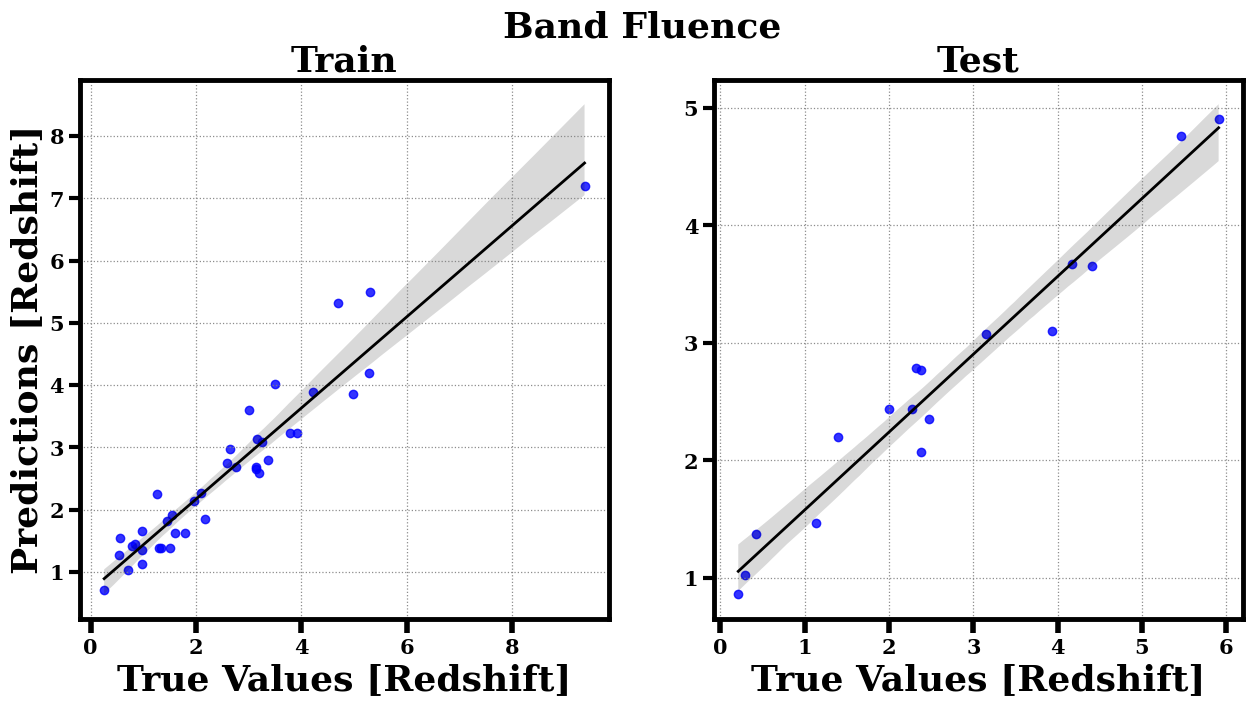

In [26]:
# Datasets for ploting: data1 is training data, data2 is testing data
data1 = Train
data2 = Test

# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plot for training data (left subplot)
sns.regplot(
    x='Actual Train',             # true redshift from training data
    y='Predicted Train',          # predicted redshift from training data
    data=data1,
    ax=axes[0],
    color='k',
    scatter_kws={'color': 'blue'},
    line_kws={'linewidth': 2}
)
axes[0].set_title('Train', fontweight="bold", fontsize=26)
axes[0].set_xlabel("True Values [Redshift]", fontweight="bold", fontsize=26)
axes[0].set_ylabel("Predictions [Redshift]", fontweight="bold", fontsize=26)

# grid
axes[0].grid(which='both', color='gray', linestyle=':', linewidth=0.9, alpha=0.9)

# Plot for testing data (right subplot)
sns.regplot(
    x="Actual Test",            #  true redshift  from test data
    y="Predicted Test",         # predicted redshift  from test data
    data=data2,
    ax=axes[1],
    color='k',
    scatter_kws={'color': 'blue'},
    line_kws={'linewidth': 2}
)
axes[1].set_title('Test', fontweight="bold", fontsize=26)
axes[1].set_xlabel("True Values [Redshift]", fontweight="bold", fontsize=26)
axes[1].set_ylabel("")
#  grid
axes[1].grid(which='both', color='gray', linestyle=':', linewidth=0.9, alpha=0.9)

#
fig.suptitle("Band Fluence", fontweight="bold", fontsize=26)

# plt.savefig("DNN_Estimator_Band_Fluence.png")

plt.show()

- # Cleaning and transforming dataset

In [27]:
# Use the existing GBM_df DataFrame
Band_flc = GBM_df.copy()

# Remove any rows with missing values
Band_flc = Band_flc.dropna()
# To keep Long GRBs only
Band_flc = Band_flc[Band_flc['T90'] >= 2.1]
# Remove any rows with high Beta
Band_flc = Band_flc[Band_flc['Beta'] <= -2]
# Apply log10
log = np.log10(Band_flc[['T90','Ep','Sbolo']])
# Extract the spectral indices (alpha, beta) — not log-transformed
Alpha_flc = Band_flc['Alpha']
Beta_flc = Band_flc['Beta']
log['Alpha_flc'] = Alpha_flc
log['Beta_flc'] = Beta_flc
# Apply scaling
log = scaler.fit_transform(log)
# New data will be:
NewData  = pd.DataFrame(log, columns=['feature_{}'.format(i) for i in range(log.shape[1])])

- # Predicting on new dataset

In [28]:
predictions_red = []
for model in models:
    # Make predictions on New Data
    prediction_red = model.predict(NewData)
    predictions_red.append(prediction_red.flatten())

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


- # Stacking new predictions as meta-features

In [29]:
meta_fea = np.column_stack(predictions_red)

- # Generating final pseudo-redshift predictions.

In [30]:
pseudo_red = final_estimator.predict(meta_fea)

- # Comparing lengths of true and predicted redshifts

In [31]:
len(Data_y) , len(pseudo_red)

(56, 50)

- # Appending pseudo-redshifts to dataset

In [32]:
# Append pseudo-redshifts to the complete Band flc dataset
Band_flc['pseudo_redshift'] = pseudo_red

- # Exporting DataFrame to CSV

In [33]:
# Export to CSV file
Band_flc.to_csv('pseudo_redshift_bandflc.csv', index=False)

- # Checking predicted redshift range

In [34]:
# Check pseudo redshift ranges
pseudo_red.min(), pseudo_red.max()

(1.1474289999999991, 4.830770000000007)

- # Checking minimum and maximum redshift

In [35]:
# Check true redshift ranges
Data_y.min(), Data_y.max()

(0.211, 9.38)

- # Defining custom histogram bin edges

In [36]:
# Define custom histogram bin edges for redshift
xbin = [-0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8, 8.6, 9, 9.5]

- # Creating normalized histogram of true redshifts

In [37]:
# Create a normalized histogram of the true redshifts
heights, edges = np.histogram(Data_y, bins = xbin)
heights = heights/heights.sum()
heights.sum()

1.0

- # Calculating histogram bin centers

In [38]:
# Compute the bin centers for plotting
binCenters = (edges[:-1] + edges[1:])/2

- # Computing normalized histogram sum

In [39]:
# Create a normalized histogram of predicted redshifts (pseudo_red)
heights1, edges = np.histogram(pseudo_red, bins = xbin)
heights1 = heights1/heights1.sum()
heights1.sum()

1.0

- # Plotting overlapping redshift histograms

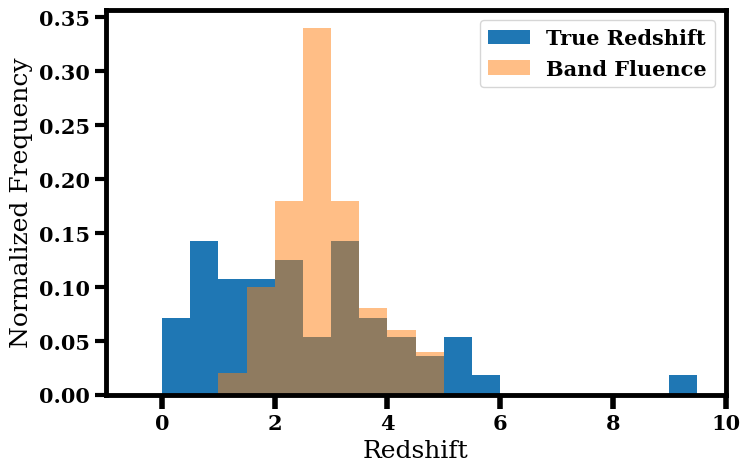

In [40]:
# Plot both histograms
plt.figure(figsize=(8, 5))
plt.bar(binCenters, heights, width = 0.5, label='True Redshift')
plt.bar(binCenters, heights1, alpha = 0.5, width = 0.5, label='Band Fluence')
plt.xlabel('Redshift', fontsize=18, fontweight='normal')
plt.ylabel('Normalized Frequency', fontsize=18, fontweight='normal')
plt.legend()

- # Performing Kolmogorov-Smirnov test

In [41]:
# Apply Kolmogorov–Smirnov test to compare the two normalized redshit values: close to one is best
_, p_value = kstest(heights, heights1)
print('Kolmogorov-Smirnov Test p-value Band Fluence:', p_value)

Kolmogorov-Smirnov Test p-value Band Fluence: 0.571336004933722
